In [ ]:
import pandas as pd
import numpy as np

streaming = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv', index_col='ID')

In [ ]:
streaming.head()
streaming.rename(columns={'Rotten Tomatoes': 'Rotten_Tomatoes'}, inplace=True)

In [ ]:
streaming.isnull().sum()
streaming.dropna(inplace=True)

In [ ]:
streaming['Age'].value_counts()

18+    2195
7+     1022
13+     951
all     650
16+     262
Name: Age, dtype: int64

In [ ]:
streaming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5080 entries, 1 to 9496
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5080 non-null   int64  
 1   Title            5080 non-null   object 
 2   Year             5080 non-null   int64  
 3   Age              5080 non-null   object 
 4   IMDb             5080 non-null   object 
 5   Rotten_Tomatoes  5080 non-null   object 
 6   Netflix          5080 non-null   int64  
 7   Hulu             5080 non-null   int64  
 8   Prime Video      5080 non-null   int64  
 9   Disney+          5080 non-null   int64  
 10  Type             5080 non-null   int64  
 11  Directors        5080 non-null   object 
 12  Genres           5080 non-null   object 
 13  Country          5080 non-null   object 
 14  Language         5080 non-null   object 
 15  Runtime          5080 non-null   float64
dtypes: float64(1), int64(7), object(8)
memory usage: 674.7+ KB


In [ ]:
streaming['Type'].value_counts()
streaming.drop(['Unnamed: 0' , 'Type'], 1, inplace=True)

In [ ]:
#Functions to convert the ratings score on IMDb and Rotten Tomatoes from string to floats and integers

def rating_strip_10(x):
  if x == '10/10':
    return 10.0
  else:
    return float(x.replace('/10', ''))

def rating_strip_100(x):
  if x == '100/100':
    return 100
  else:
    return int(x.replace('/100', ''))

In [ ]:
streaming['Rotten_Tomatoes'] = streaming['Rotten_Tomatoes'].apply(rating_strip_100)
streaming['IMDb'] = streaming['IMDb'].apply(rating_strip_10)

In [ ]:
streaming.head()

,Title,Year,Age,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
ID,,,,,,,,,,,,,,
1,The Irishman,2019,18+,7.8,98,1,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
2,Dangal,2016,7+,8.4,97,1,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
3,David Attenborough: A Life on Our Planet,2020,7+,9.0,95,1,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
4,Lagaan: Once Upon a Time in India,2001,7+,8.1,94,1,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
6,To All the Boys I've Loved Before,2018,13+,7.1,94,1,0,0,0,Susan Johnson,"Comedy,Drama,Romance",United States,English,99.0


In [ ]:
streaming['Streaming_Channel_Count'] = streaming['Netflix'] + streaming['Prime Video'] + streaming['Hulu'] + streaming['Disney+']

In [ ]:
streaming['Runtime_hrs'] = streaming['Runtime']/60

In [ ]:
streaming.head()

,Title,Year,Age,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,Streaming_Channel_Count,Runtime_hrs
ID,,,,,,,,,,,,,,,,
1,The Irishman,2019,18+,7.8,98,1,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0,1,3.483333
2,Dangal,2016,7+,8.4,97,1,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0,1,2.683333
3,David Attenborough: A Life on Our Planet,2020,7+,9.0,95,1,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0,1,1.383333
4,Lagaan: Once Upon a Time in India,2001,7+,8.1,94,1,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0,1,3.733333
6,To All the Boys I've Loved Before,2018,13+,7.1,94,1,0,0,0,Susan Johnson,"Comedy,Drama,Romance",United States,English,99.0,1,1.650000


In [ ]:
streaming.describe()

,Year,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+,Runtime,Streaming_Channel_Count,Runtime_hrs
count,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000,5080.000000
mean,2008.325984,6.154252,58.976772,0.354921,0.137402,0.409055,0.130709,98.979921,1.032087,1.649665
std,14.287737,1.143680,12.341464,0.478537,0.344305,0.491708,0.337115,25.088361,0.182827,0.418139
min,1919.000000,1.100000,26.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.033333
25%,2005.000000,5.500000,50.000000,0.000000,0.000000,0.000000,0.000000,88.000000,1.000000,1.466667
50%,2013.000000,6.200000,58.000000,0.000000,0.000000,0.000000,0.000000,97.000000,1.000000,1.616667
75%,2018.000000,7.000000,67.000000,1.000000,0.000000,1.000000,0.000000,110.000000,1.000000,1.833333
max,2021.000000,9.000000,98.000000,1.000000,1.000000,1.000000,1.000000,359.000000,4.000000,5.983333


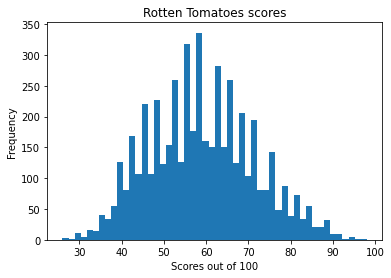

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(streaming['Rotten_Tomatoes'], bins=50)

ax.set_xlabel('Scores out of 100') 
ax.set_ylabel('Frequency') 
ax.set_title('Rotten Tomatoes scores') 
plt.show()

In [ ]:
streaming_netflix = streaming[streaming['Netflix']==1]
streaming_hulu = streaming[streaming['Hulu']==1]
streaming_prime = streaming[streaming['Prime Video']==1]
streaming_disney = streaming[streaming['Disney+']==1]

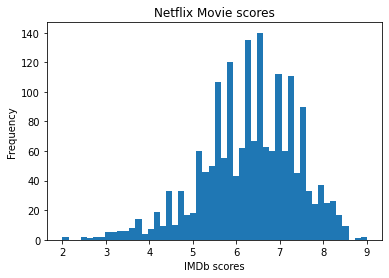

In [ ]:
fig, ax = plt.subplots()

ax.hist(streaming_netflix['IMDb'], bins=50)

ax.set_xlabel('IMDb scores') 
ax.set_ylabel('Frequency') 
ax.set_title('Netflix Movie scores') 
plt.show()

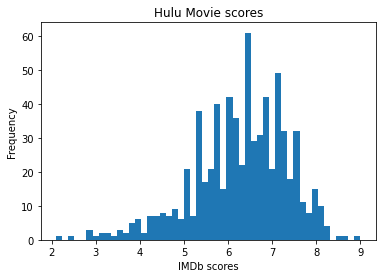

In [ ]:
fig, ax = plt.subplots()

ax.hist(streaming_hulu['IMDb'], bins=50)

ax.set_xlabel('IMDb scores') 
ax.set_ylabel('Frequency') 
ax.set_title('Hulu Movie scores') 
plt.show()

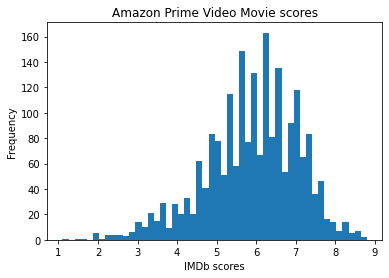

In [ ]:
fig, ax = plt.subplots()

ax.hist(streaming_prime['IMDb'], bins=50)

ax.set_xlabel('IMDb scores') 
ax.set_ylabel('Frequency') 
ax.set_title('Amazon Prime Video Movie scores') 
plt.show()

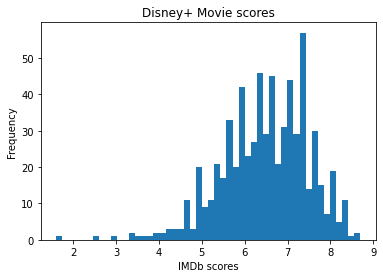

In [ ]:
fig, ax = plt.subplots()

ax.hist(streaming_disney['IMDb'], bins=50)

ax.set_xlabel('IMDb scores') 
ax.set_ylabel('Frequency') 
ax.set_title('Disney+ Movie scores') 
plt.show()

In [ ]:
import scipy.stats as st
st.ttest_1samp(streaming_hulu['IMDb'], 7.0)

Ttest_1sampResult(statistic=-17.62181734831927, pvalue=9.242948034006813e-58)

In [ ]:
import scipy.stats as st
st.ttest_1samp(streaming_hulu['IMDb'], 7.0)

Ttest_1sampResult(statistic=-17.62181734831927, pvalue=9.242948034006813e-58)

In [ ]:
import scipy.stats as st
st.ttest_1samp(streaming_prime['IMDb'], 7.0)

Ttest_1sampResult(statistic=-42.819618256444464, pvalue=1.0707866957866429e-287)

In [ ]:
import scipy.stats as st
st.ttest_1samp(streaming_disney['IMDb'], 7.0)

Ttest_1sampResult(statistic=-13.166524162319229, pvalue=2.4496676476198683e-35)

In [ ]:
streaming_disney.describe()

,Year,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+,Runtime,Streaming_Channel_Count,Runtime_hrs
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.0,664.000000,664.000000,664.000000
mean,2000.251506,6.486747,63.167169,0.004518,0.006024,0.009036,1.0,87.469880,1.019578,1.457831
std,18.301769,1.004487,11.808965,0.067115,0.077439,0.094700,0.0,32.834366,0.168148,0.547239
min,1928.000000,1.600000,33.000000,0.000000,0.000000,0.000000,1.0,2.000000,1.000000,0.033333
25%,1995.000000,5.875000,55.000000,0.000000,0.000000,0.000000,1.0,78.000000,1.000000,1.300000
50%,2005.000000,6.500000,62.000000,0.000000,0.000000,0.000000,1.0,92.000000,1.000000,1.533333
75%,2013.000000,7.200000,72.000000,0.000000,0.000000,0.000000,1.0,105.000000,1.000000,1.750000
max,2021.000000,8.700000,96.000000,1.000000,1.000000,1.000000,1.0,181.000000,4.000000,3.016667


In [ ]:
streaming_netflix.describe()

,Year,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+,Runtime,Streaming_Channel_Count,Runtime_hrs
count,1803.000000,1803.000000,1803.000000,1803.0,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000
mean,2014.277316,6.304326,61.044925,1.0,0.015530,0.036606,0.001664,102.736550,1.053799,1.712276
std,7.608167,1.095771,12.439317,0.0,0.123681,0.187844,0.040768,26.702121,0.239984,0.445035
min,1964.000000,2.000000,29.000000,1.0,0.000000,0.000000,0.000000,9.000000,1.000000,0.150000
25%,2012.000000,5.600000,52.000000,1.0,0.000000,0.000000,0.000000,90.000000,1.000000,1.500000
50%,2017.000000,6.400000,60.000000,1.0,0.000000,0.000000,0.000000,100.000000,1.000000,1.666667
75%,2019.000000,7.100000,70.000000,1.0,0.000000,0.000000,0.000000,116.000000,1.000000,1.933333
max,2021.000000,9.000000,98.000000,1.0,1.000000,1.000000,1.000000,359.000000,4.000000,5.983333


In [ ]:
streaming_hulu.describe()

,Year,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+,Runtime,Streaming_Channel_Count,Runtime_hrs
count,698.000000,698.000000,698.000000,698.000000,698.0,698.000000,698.000000,698.000000,698.000000,698.000000
mean,2010.621777,6.286246,63.772206,0.040115,1.0,0.088825,0.005731,101.345272,1.134670,1.689088
std,11.025869,1.070102,10.697268,0.196369,0.0,0.284695,0.075538,21.529460,0.365948,0.358824
min,1940.000000,2.100000,31.000000,0.000000,1.0,0.000000,0.000000,5.000000,1.000000,0.083333
25%,2007.000000,5.600000,56.000000,0.000000,1.0,0.000000,0.000000,90.000000,1.000000,1.500000
50%,2015.000000,6.400000,64.000000,0.000000,1.0,0.000000,0.000000,100.000000,1.000000,1.666667
75%,2018.000000,7.100000,72.000000,0.000000,1.0,0.000000,0.000000,110.000000,1.000000,1.833333
max,2021.000000,9.000000,94.000000,1.000000,1.0,1.000000,1.000000,317.000000,4.000000,5.283333


In [ ]:
streaming_prime.describe()

,Year,IMDb,Rotten_Tomatoes,Netflix,Hulu,Prime Video,Disney+,Runtime,Streaming_Channel_Count,Runtime_hrs
count,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000,2078.0,2078.000000,2078.000000,2078.000000,2078.000000
mean,2004.960058,5.889654,54.716073,0.031761,0.029836,1.0,0.002887,99.099134,1.064485,1.651652
std,15.686439,1.182057,11.457915,0.175406,0.170177,0.0,0.053670,20.615138,0.257164,0.343586
min,1919.000000,1.100000,26.000000,0.000000,0.000000,1.0,0.000000,22.000000,1.000000,0.366667
25%,2000.000000,5.200000,46.000000,0.000000,0.000000,1.0,0.000000,89.000000,1.000000,1.483333
50%,2010.000000,6.000000,54.000000,0.000000,0.000000,1.0,0.000000,96.000000,1.000000,1.600000
75%,2016.000000,6.700000,63.000000,0.000000,0.000000,1.0,0.000000,107.000000,1.000000,1.783333
max,2021.000000,8.800000,93.000000,1.000000,1.000000,1.0,1.000000,317.000000,4.000000,5.283333
